# PART- 2 ( Handling With Missing Values )

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid") 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150 
pd.options.display.max_columns = 100
import json
import regex as re
from datetime import date
from datetime import datetime
from datetime import timedelta

C:\Users\gundo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("clean_scout_emre.csv")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans
price,15770,14500,14640,14500,16790,15090,16422,14480,16700,17990
vat,VAT deductible,Price negotiable,VAT deductible,NaN,NaN,NaN,VAT deductible,VAT deductible,NaN,NaN
km,56013.000,80000.000,83450.000,73000.000,16200.000,63668.000,62111.000,14986.000,57000.000,16103.000
Type,Used,Used,Used,Used,Used,Used,Used,Used,Used,Used
Warranty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000,3.000
Body Color,Black,Red,Black,Brown,Black,White,White,Red,Grey,White
Paint Type,Metallic,NaN,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,Metallic,NaN
Body Color Original,Mythosschwarz,NaN,mythosschwarz metallic,NaN,Mythosschwarz Metallic,NaN,Gletscherweiss,Misanorot Perleffekt,Grigio,Blanc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             15919 non-null  object 
 1   body_type              15859 non-null  object 
 2   price                  15919 non-null  int64  
 3   vat                    11406 non-null  object 
 4   km                     14895 non-null  float64
 5   Type                   15917 non-null  object 
 6   Warranty               4853 non-null   float64
 7   Body Color             15322 non-null  object 
 8   Paint Type             10147 non-null  object 
 9   Body Color Original    12145 non-null  object 
 10  Gearing Type           15919 non-null  object 
 11  Cylinders              10239 non-null  float64
 12  Fuel                   15919 non-null  object 
 13  Comfort & Convenience  14999 non-null  object 
 14  Entertainment & Media  14545 non-null  object 
 15  Ex

In [5]:
df.isnull()

,make_model,body_type,price,vat,km,Type,Warranty,Body Color,Paint Type,Body Color Original,Gearing Type,Cylinders,Fuel,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Gears,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Upholstery_color,Nr_of_Doors,Nr_of_Seats,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cons_city,cons_country,CO2_Emission,Emission_Class
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True
15915,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
15916,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
15917,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.notnull()

,make_model,body_type,price,vat,km,Type,Warranty,Body Color,Paint Type,Body Color Original,Gearing Type,Cylinders,Fuel,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Gears,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Upholstery_color,Nr_of_Doors,Nr_of_Seats,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cons_city,cons_country,CO2_Emission,Emission_Class
0,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,False,True,False,False,True,True,True,True,True,True,True,True,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,False,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True
3,True,True,True,False,True,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,False,False,True,True,True,True,True,False,True,True,True,True,True
4,True,True,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True,False,False,True,True,True,True,True,True,True,True,True,True,False
15915,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True,True,True,True,True,True,True,True,True,True,False
15916,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True
15917,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,False,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True


In [7]:
df.isnull().any()
#  columns/variables containing any missing values

make_model               False
body_type                 True
price                    False
vat                       True
km                        True
Type                      True
Warranty                  True
Body Color                True
Paint Type                True
Body Color Original       True
Gearing Type             False
Cylinders                 True
Fuel                     False
Comfort & Convenience     True
Entertainment & Media     True
Extras                    True
Safety & Security         True
Gears                     True
Previous_Owners           True
hp_kW                     True
Inspection_new            True
Paint_Type                True
Upholstery_type           True
Upholstery_color          True
Nr_of_Doors               True
Nr_of_Seats               True
Gearing_Type             False
Displacement_cc           True
Weight_kg                 True
Drive_chain               True
cons_comb                 True
cons_city                 True
cons_cou

In [8]:
# rows containing any missing values

df.isnull().any(axis=1)

0        True
1        True
2        True
3        True
4        True
         ... 
15914    True
15915    True
15916    True
15917    True
15918    True
Length: 15919, dtype: bool

In [9]:
#number of missing values in the columns

df.isnull().sum()

make_model                   0
body_type                   60
price                        0
vat                       4513
km                        1024
Type                         2
Warranty                 11066
Body Color                 597
Paint Type                5772
Body Color Original       3774
Gearing Type                 0
Cylinders                 5680
Fuel                         0
Comfort & Convenience      920
Entertainment & Media     1374
Extras                    2962
Safety & Security          982
Gears                     4712
Previous_Owners           6640
hp_kW                       88
Inspection_new           11987
Paint_Type                5772
Upholstery_type           4871
Upholstery_color          5078
Nr_of_Doors                212
Nr_of_Seats                977
Gearing_Type                 0
Displacement_cc            496
Weight_kg                 6974
Drive_chain               6858
cons_comb                 2033
cons_city                 2436
cons_cou

In [10]:
df.isnull().sum().sum()
# total NaN Values

106300

In [11]:
# percentage of null values by columns

df.isnull().sum()/len(df)*100

make_model               0.000
body_type                0.377
price                    0.000
vat                     28.350
km                       6.433
Type                     0.013
Warranty                69.514
Body Color               3.750
Paint Type              36.259
Body Color Original     23.708
Gearing Type             0.000
Cylinders               35.681
Fuel                     0.000
Comfort & Convenience    5.779
Entertainment & Media    8.631
Extras                  18.607
Safety & Security        6.169
Gears                   29.600
Previous_Owners         41.711
hp_kW                    0.553
Inspection_new          75.300
Paint_Type              36.259
Upholstery_type         30.599
Upholstery_color        31.899
Nr_of_Doors              1.332
Nr_of_Seats              6.137
Gearing_Type             0.000
Displacement_cc          3.116
Weight_kg               43.809
Drive_chain             43.081
cons_comb               12.771
cons_city               15.302
cons_cou

In [12]:
df.drop("Inspection_new", axis=1, inplace=True)
# Yüzde 75 Nan olduğu için düşürdüm

In [13]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
Type,Used,Used,Used
Warranty,NaN,NaN,NaN
Body Color,Black,Red,Black
Paint Type,Metallic,NaN,Metallic
Body Color Original,Mythosschwarz,NaN,mythosschwarz metallic


In [14]:
df.drop("Warranty", axis=1, inplace=True)

In [15]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
Type,Used,Used,Used
Body Color,Black,Red,Black
Paint Type,Metallic,NaN,Metallic
Body Color Original,Mythosschwarz,NaN,mythosschwarz metallic
Gearing Type,Automatic,Automatic,Automatic


In [16]:
df.isnull().sum()/len(df)*100

make_model               0.000
body_type                0.377
price                    0.000
vat                     28.350
km                       6.433
Type                     0.013
Body Color               3.750
Paint Type              36.259
Body Color Original     23.708
Gearing Type             0.000
Cylinders               35.681
Fuel                     0.000
Comfort & Convenience    5.779
Entertainment & Media    8.631
Extras                  18.607
Safety & Security        6.169
Gears                   29.600
Previous_Owners         41.711
hp_kW                    0.553
Paint_Type              36.259
Upholstery_type         30.599
Upholstery_color        31.899
Nr_of_Doors              1.332
Nr_of_Seats              6.137
Gearing_Type             0.000
Displacement_cc          3.116
Weight_kg               43.809
Drive_chain             43.081
cons_comb               12.771
cons_city               15.302
cons_country            14.926
CO2_Emission            15.302
Emission

In [17]:
df[~df.isnull().any(axis = 1)]

# rows containing full of notnull values using "~"

,make_model,body_type,price,vat,km,Type,Body Color,Paint Type,Body Color Original,Gearing Type,Cylinders,Fuel,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Gears,Previous_Owners,hp_kW,Paint_Type,Upholstery_type,Upholstery_color,Nr_of_Doors,Nr_of_Seats,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cons_city,cons_country,CO2_Emission,Emission_Class
14,Audi A1,Sedans,17990,VAT deductible,34914.000,Used,Black,Metallic,Mythosschwarz Metallic,Automatic,3.000,Benzine,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Daytime running lights,D...",7.000,1.000,70.000,Metallic,Cloth,Black,5.000,4.000,Automatic,999.000,1135.000,front,4.200,5.000,3.700,99.000,Euro 6
15,Audi A1,Sedans,18700,VAT deductible,27000.000,Employee's car,Grey,Metallic,Grigio,Automatic,4.000,Diesel,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",7.000,1.000,85.000,Metallic,Cloth,Grey,5.000,4.000,Automatic,1598.000,1275.000,front,3.700,4.300,3.400,97.000,Euro 6
45,Audi A1,Sedans,11490,VAT deductible,97976.000,Used,Black,Metallic,Mythosschwarz Metallic,Manual,3.000,Benzine,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000,1.000,70.000,Metallic,Cloth,Black,3.000,4.000,Manual,999.000,1110.000,front,4.200,5.000,3.700,99.000,Euro 6
60,Audi A1,Sedans,10800,VAT deductible,99000.000,Used,Black,Metallic,Nero,Manual,3.000,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Touch screen,Voice Control","ABS,Alarm system,Central door lock,Central doo...",5.000,1.000,66.000,Metallic,Cloth,Black,5.000,4.000,Manual,1422.000,1205.000,front,3.700,4.200,3.400,97.000,Euro 6
77,Audi A1,Compact,18880,VAT deductible,30952.000,Used,Black,Metallic,mythosschwarz metallic,Automatic,4.000,Benzine,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Daytime running lights,D...",7.000,1.000,92.000,Metallic,Full leather,Black,5.000,4.000,Automatic,1395.000,1180.000,front,5.200,6.700,4.400,123.000,Euro 6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15818,Renault Espace,Van,54120,VAT deductible,200.000,Demonstration,Black,Metallic,amethyst black,Automatic,4.000,Benzine,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter","ABS,Adaptive Cruise Control,Blind spot monitor...",7.000,1.000,165.000,Metallic,Full leather,Brown,5.000,5.000,Automatic,1798.000,1939.000,front,7.400,9.200,6.300,168.000,Euro 6
15820,Renault Espace,Station wagon,52990,VAT deductible,1550.000,Used,Black,Metallic,Black Pearl-Schwarz Metallic,Automatic,4.000,Diesel,"Cruise control,Electrically adjustable seats,E...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",6.000,1.000,147.000,Metallic,Full leather,Brown,5.000,5.000,Automatic,1997.000,1840.000,front,5.300,6.200,4.700,139.000,Euro 6
15870,Renault Espace,Van,48990,VAT deductible,2860.000,Demonstration,Grey,Metallic,Titanium-Grau,Automatic,4.000,Benzine,"Armrest,Cruise control,Electrically adjustable...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,1.000,165.000,Metallic,Full leather,Brown,5.000,5.000,Automatic,1798.000,1685.000,4WD,6.800,8.700,5.700,153.000,Euro 6
15886,Renault Espace,Van,42990,VAT

In [18]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,15869,15870,15871,15872,15873,15874,15875,15876,15877,15878,15879,15880,15881,15882,15883,15884,15885,15886,15887,15888,15889,15890,15891,15892,15893,15894,15895,15896,15897,15898,15899,15900,15901,15902,15903,15904,15905,15906,15907,15908,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Compact,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Compact,Sedans,Sedans,Compact,Compact,Sedans,Compact,Sedans,Sedans,Compact,Sedans,Sedans,Sedans,Compact,Compact,Compact,Compact,Compact,Sedans,Sedans,Sedans,Sedans,Compact,Compact,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Sedans,Van,Van,Van,Station wagon,Van,Van,Station wagon,Van,Station wagon,Station wagon,Van,Van,Van,Van,Station wagon,Van,Van,Van,Van,Van,Van,Sedans,Van,Station wagon,Compact,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
price,15770,14500,14640,14500,16790,15090,16422,14480,16700,17990,18500,17990,18380,18399,17990,18700,18900,18500,18400,18500,18500,18500,18900,18850,18500,8999,11444,11300,18900,11290,11290,11440,11445,11700,11900,11949,11890,11600,11900,11630,11880,11800,11850,11569,11490,11490,11500,11790,11490,11470,...,49100,48990,48990,49390,48900,43500,48800,48765,48720,48490,47990,48498,47990,40970,47950,42990,47950,42990,42680,47990,42560,42490,42500,41800,42500,41899,42490,41900,41790,41400,41395,41480,41400,41043,39990,41390,39990,39990,39990,39990,39990,39980,39980,39950,39950,39950,39885,39875,39700,40999
vat,VAT deductible,Price negotiable,VAT deductible,NaN,NaN,NaN,VAT deductible,VAT deductible,NaN,NaN,VAT deductible,NaN,NaN,NaN,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,Price negotiable,VAT deductible,Price negotiable,VAT deductible,VAT deductible,NaN,VAT deductible,NaN,VAT deductible,NaN,NaN,VAT deductible,VAT deductible,VAT deductible,NaN,VAT deductible,NaN,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,NaN,NaN,NaN,VAT deductible,...,VAT deductible,VAT deductible,VAT deductible,NaN,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,NaN,VAT deductible,VAT deductible,VAT deductible,NaN,VAT deductible,VAT deductible,VAT deductible,VAT deductible,NaN,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,NaN,VAT deductible,VAT deductible,VAT deductible,VAT deductible,NaN,VAT deductibl

# Filling Body Type

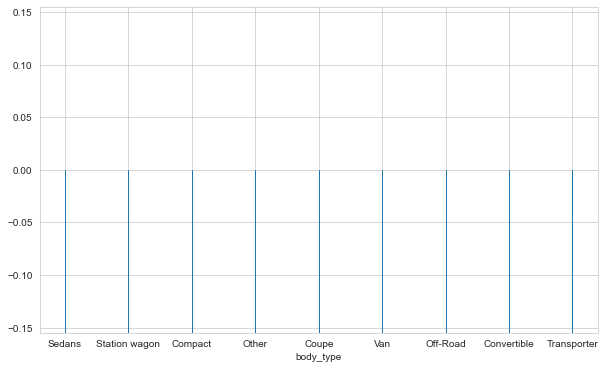

In [19]:
sns.rugplot(df["body_type"], height=0.5);

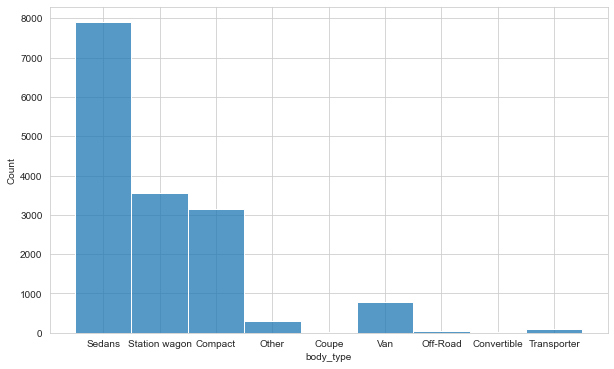

In [20]:
sns.histplot(data=df, x="body_type", bins=10);  

In [21]:
df["body_type"].mode()

0    Sedans
dtype: object

In [22]:
df["body_type"].fillna(df["body_type"].mode()[0],inplace=True)

In [23]:
df.body_type.value_counts()

Sedans           7963
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

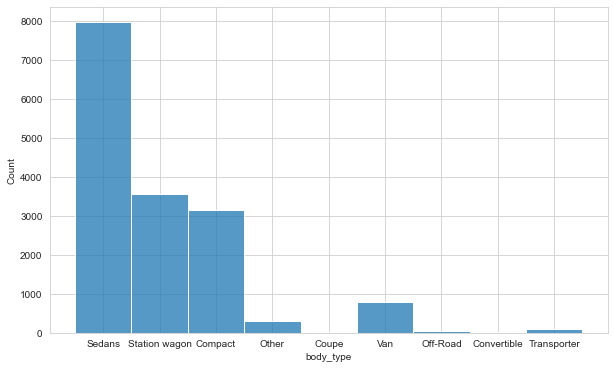

In [24]:
sns.histplot(data=df, x="body_type", bins=10); 

In [25]:
df.isnull().sum()/len(df)*100

make_model               0.000
body_type                0.000
price                    0.000
vat                     28.350
km                       6.433
Type                     0.013
Body Color               3.750
Paint Type              36.259
Body Color Original     23.708
Gearing Type             0.000
Cylinders               35.681
Fuel                     0.000
Comfort & Convenience    5.779
Entertainment & Media    8.631
Extras                  18.607
Safety & Security        6.169
Gears                   29.600
Previous_Owners         41.711
hp_kW                    0.553
Paint_Type              36.259
Upholstery_type         30.599
Upholstery_color        31.899
Nr_of_Doors              1.332
Nr_of_Seats              6.137
Gearing_Type             0.000
Displacement_cc          3.116
Weight_kg               43.809
Drive_chain             43.081
cons_comb               12.771
cons_city               15.302
cons_country            14.926
CO2_Emission            15.302
Emission

# Filling Vat

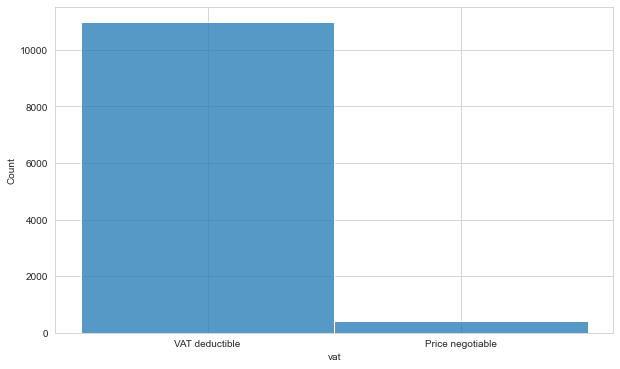

In [26]:
sns.histplot(data=df, x="vat", bins=10);  

In [27]:
df["vat"].mode()

0    VAT deductible
dtype: object

In [28]:
df["vat"].fillna(df["vat"].mode()[0],inplace=True)

In [29]:
df.vat

0          VAT deductible
1        Price negotiable
2          VAT deductible
3          VAT deductible
4          VAT deductible
               ...       
15914      VAT deductible
15915      VAT deductible
15916      VAT deductible
15917      VAT deductible
15918      VAT deductible
Name: vat, Length: 15919, dtype: object

In [30]:
df.isnull().sum()/len(df)*100

make_model               0.000
body_type                0.000
price                    0.000
vat                      0.000
km                       6.433
Type                     0.013
Body Color               3.750
Paint Type              36.259
Body Color Original     23.708
Gearing Type             0.000
Cylinders               35.681
Fuel                     0.000
Comfort & Convenience    5.779
Entertainment & Media    8.631
Extras                  18.607
Safety & Security        6.169
Gears                   29.600
Previous_Owners         41.711
hp_kW                    0.553
Paint_Type              36.259
Upholstery_type         30.599
Upholstery_color        31.899
Nr_of_Doors              1.332
Nr_of_Seats              6.137
Gearing_Type             0.000
Displacement_cc          3.116
Weight_kg               43.809
Drive_chain             43.081
cons_comb               12.771
cons_city               15.302
cons_country            14.926
CO2_Emission            15.302
Emission

# Filling Km

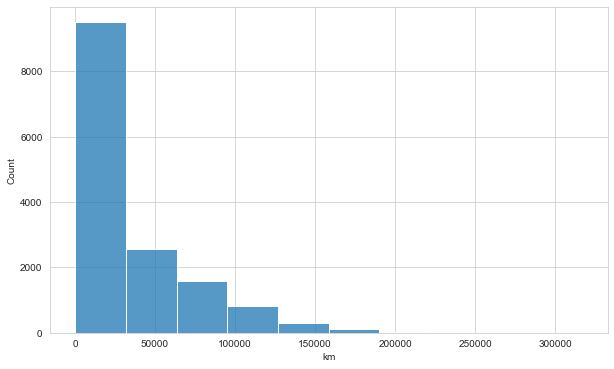

In [31]:
sns.histplot(data=df, x="km", bins=10);  

In [32]:
df.km.value_counts()

10.000       1045
1.000         367
5.000         170
50.000        148
100.000       139
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6689, dtype: int64

In [159]:
df["km"].fillna(method="ffill", inplace=True)

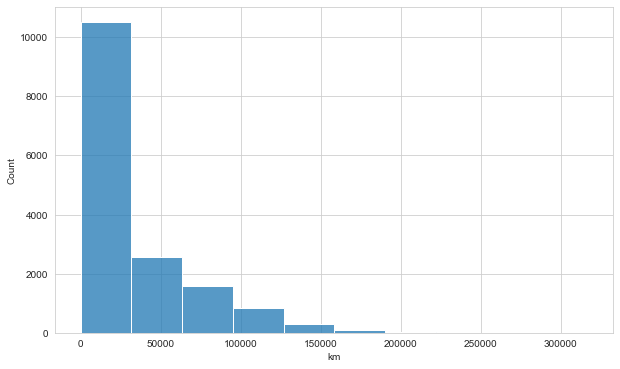

In [160]:
sns.histplot(data=df, x="km", bins=10);  

# Filling Type

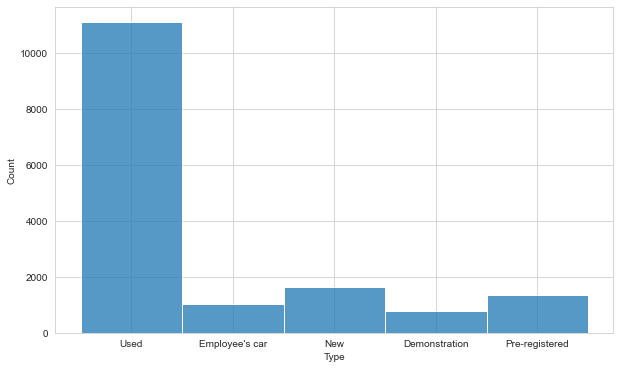

In [33]:
sns.histplot(data=df, x="Type", bins=10);

In [34]:
df["Type"].mode()

0    Used
dtype: object

In [35]:
df["Type"].fillna(df["Type"].mode()[0],inplace=True)

In [77]:
df.isnull().sum()/len(df)*100

make_model               0.000
body_type                0.000
price                    0.000
vat                      0.000
km                       6.433
Type                     0.000
Body Color               3.750
Paint Type              36.259
Body Color Original     23.708
Gearing Type             0.000
Cylinders               35.681
Fuel                     0.000
Comfort & Convenience    5.779
Entertainment & Media    8.631
Extras                  18.607
Safety & Security        6.169
Gears                   29.600
Previous_Owners         41.711
hp_kW                    0.553
Paint_Type              36.259
Upholstery_type         30.599
Upholstery_color        31.899
Nr_of_Doors              1.332
Nr_of_Seats              6.137
Gearing_Type             0.000
Displacement_cc          3.116
Weight_kg               43.809
Drive_chain             43.081
cons_comb               12.771
cons_city               15.302
cons_country            14.926
CO2_Emission            15.302
Emission

# Filling Body Color

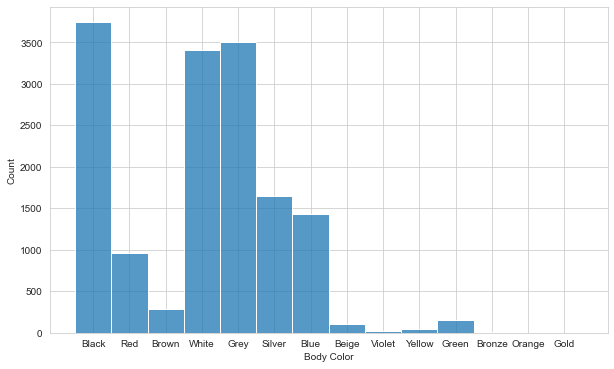

In [36]:
sns.histplot(data=df, x="Body Color", bins=10);

In [37]:
df["Body Color"].fillna(method="ffill", inplace=True)

In [38]:
df["Body Color"]

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body Color, Length: 15919, dtype: object

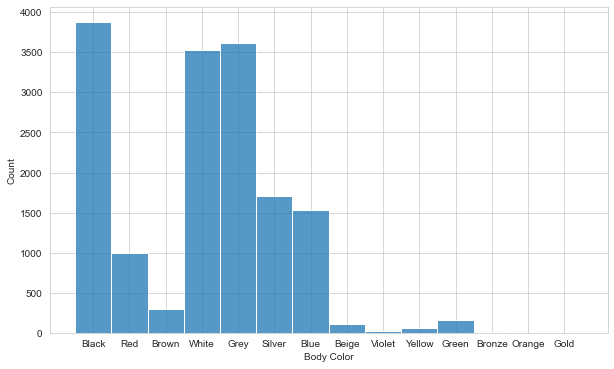

In [39]:
sns.histplot(data=df, x="Body Color", bins=10);

In [40]:
df.isnull().sum()/len(df)*100

make_model               0.000
body_type                0.000
price                    0.000
vat                      0.000
km                       6.433
Type                     0.000
Body Color               0.000
Paint Type              36.259
Body Color Original     23.708
Gearing Type             0.000
Cylinders               35.681
Fuel                     0.000
Comfort & Convenience    5.779
Entertainment & Media    8.631
Extras                  18.607
Safety & Security        6.169
Gears                   29.600
Previous_Owners         41.711
hp_kW                    0.553
Paint_Type              36.259
Upholstery_type         30.599
Upholstery_color        31.899
Nr_of_Doors              1.332
Nr_of_Seats              6.137
Gearing_Type             0.000
Displacement_cc          3.116
Weight_kg               43.809
Drive_chain             43.081
cons_comb               12.771
cons_city               15.302
cons_country            14.926
CO2_Emission            15.302
Emission

# Filling Paint Type

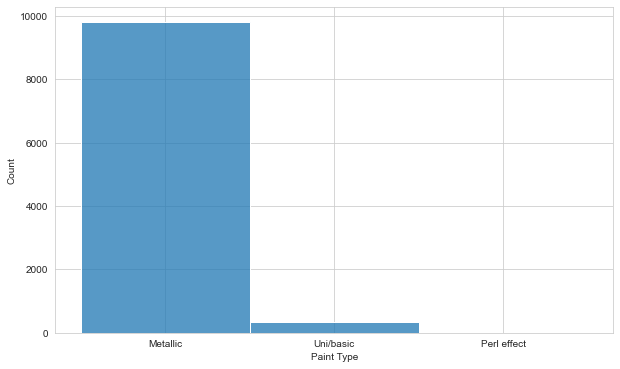

In [41]:
sns.histplot(data=df, x="Paint Type", bins=10);

In [42]:
df["Paint Type"].fillna(method="ffill", inplace=True)

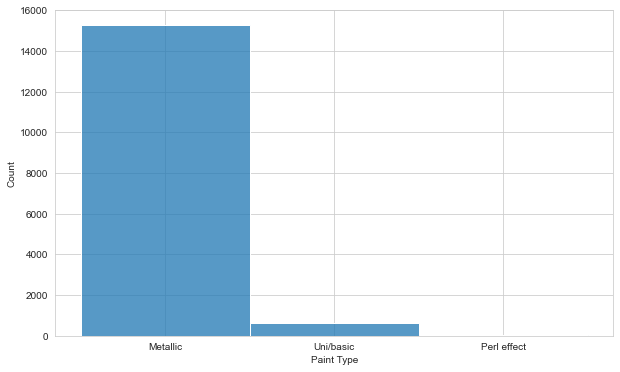

In [43]:
sns.histplot(data=df, x="Paint Type", bins=10);

In [44]:
df.isnull().sum()/len(df)*100

make_model               0.000
body_type                0.000
price                    0.000
vat                      0.000
km                       6.433
Type                     0.000
Body Color               0.000
Paint Type               0.000
Body Color Original     23.708
Gearing Type             0.000
Cylinders               35.681
Fuel                     0.000
Comfort & Convenience    5.779
Entertainment & Media    8.631
Extras                  18.607
Safety & Security        6.169
Gears                   29.600
Previous_Owners         41.711
hp_kW                    0.553
Paint_Type              36.259
Upholstery_type         30.599
Upholstery_color        31.899
Nr_of_Doors              1.332
Nr_of_Seats              6.137
Gearing_Type             0.000
Displacement_cc          3.116
Weight_kg               43.809
Drive_chain             43.081
cons_comb               12.771
cons_city               15.302
cons_country            14.926
CO2_Emission            15.302
Emission

# Filling Body Color Original But I Dropped It

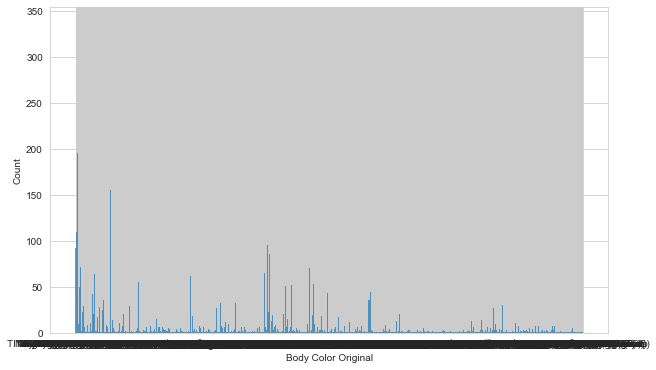

In [91]:
sns.histplot(data=df, x="Body Color Original", bins=10);

In [45]:
df["Body Color Original"].value_counts(dropna=False)

NaN                              3774
Onyx Schwarz                      338
Bianco                            282
Mythosschwarz Metallic            238
Brillantschwarz                   216
                                 ... 
Rouge-Braun (G0Y)                   1
VARI COLRI DISPONIBILI              1
Kokosnussbraun Metallic             1
Farbe frei wählbar                  1
Perlmutt-Weiß Metallic (Weiß)       1
Name: Body Color Original, Length: 1927, dtype: int64

In [46]:
df.drop("Body Color Original", axis=1, inplace=True)

In [47]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,15869,15870,15871,15872,15873,15874,15875,15876,15877,15878,15879,15880,15881,15882,15883,15884,15885,15886,15887,15888,15889,15890,15891,15892,15893,15894,15895,15896,15897,15898,15899,15900,15901,15902,15903,15904,15905,15906,15907,15908,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Compact,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Compact,Sedans,Sedans,Compact,Compact,Sedans,Compact,Sedans,Sedans,Compact,Sedans,Sedans,Sedans,Compact,Compact,Compact,Compact,Compact,Sedans,Sedans,Sedans,Sedans,Compact,Compact,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Sedans,Van,Van,Van,Station wagon,Van,Van,Station wagon,Van,Station wagon,Station wagon,Van,Van,Van,Van,Station wagon,Van,Van,Van,Van,Van,Van,Sedans,Van,Station wagon,Compact,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
price,15770,14500,14640,14500,16790,15090,16422,14480,16700,17990,18500,17990,18380,18399,17990,18700,18900,18500,18400,18500,18500,18500,18900,18850,18500,8999,11444,11300,18900,11290,11290,11440,11445,11700,11900,11949,11890,11600,11900,11630,11880,11800,11850,11569,11490,11490,11500,11790,11490,11470,...,49100,48990,48990,49390,48900,43500,48800,48765,48720,48490,47990,48498,47990,40970,47950,42990,47950,42990,42680,47990,42560,42490,42500,41800,42500,41899,42490,41900,41790,41400,41395,41480,41400,41043,39990,41390,39990,39990,39990,39990,39990,39980,39980,39950,39950,39950,39885,39875,39700,40999
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,Price negotiable,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,...,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,VAT deductible,

# Filling Cylinders

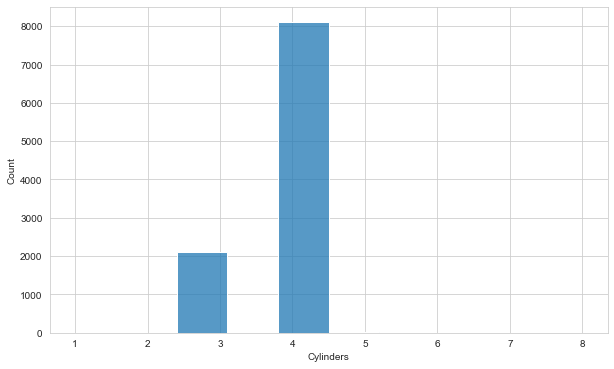

In [48]:

sns.histplot(data=df, x="Cylinders", bins=10);

In [49]:
df["Cylinders"].mode()

0   4.000
dtype: float64

In [50]:
df.Cylinders.value_counts()

4.000    8105
3.000    2104
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: Cylinders, dtype: int64

In [51]:
df["Cylinders"].fillna(method="ffill", inplace=True)

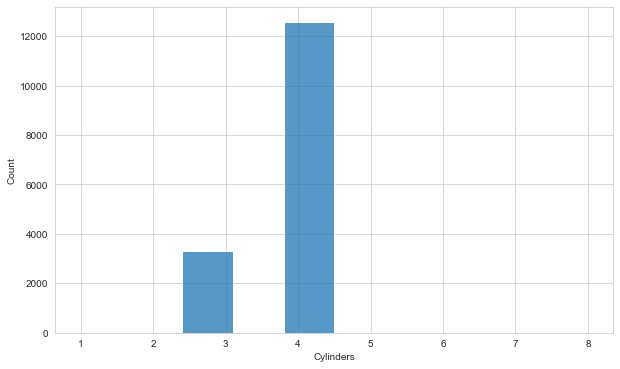

In [52]:
sns.histplot(data=df, x="Cylinders", bins=10);

In [53]:
df.isnull().sum()/len(df)*100

make_model               0.000
body_type                0.000
price                    0.000
vat                      0.000
km                       6.433
Type                     0.000
Body Color               0.000
Paint Type               0.000
Gearing Type             0.000
Cylinders                0.000
Fuel                     0.000
Comfort & Convenience    5.779
Entertainment & Media    8.631
Extras                  18.607
Safety & Security        6.169
Gears                   29.600
Previous_Owners         41.711
hp_kW                    0.553
Paint_Type              36.259
Upholstery_type         30.599
Upholstery_color        31.899
Nr_of_Doors              1.332
Nr_of_Seats              6.137
Gearing_Type             0.000
Displacement_cc          3.116
Weight_kg               43.809
Drive_chain             43.081
cons_comb               12.771
cons_city               15.302
cons_country            14.926
CO2_Emission            15.302
Emission_Class          22.790
dtype: f

# Filling Comfort & Convenience

In [60]:
df["Comfort & Convenience"].fillna(method="ffill", inplace=True)

In [61]:
df["Comfort & Convenience"].value_counts()

Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   238
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                               163
Air conditioning,Power

# Filling Entertainment & Media 

In [62]:
df["Entertainment & Media"].fillna(method="ffill", inplace=True)

In [64]:
df["Entertainment & Media"].value_counts()

Bluetooth,Hands-free equipment,On-board computer,Radio,USB                         1411
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                     1054
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB            832
On-board computer                                                                   548
Radio                                                                               530
                                                                                   ... 
Bluetooth,CD player,Digital radio,MP3,Radio,USB                                       1
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Sound system           1
Bluetooth,Digital radio,MP3,On-board computer,Radio,Sound system                      1
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Sound system,USB       1
Bluetooth,CD player,Digital radio,On-board computer                                   1
Name: Entertainment & Media, Len

# Filling Extras

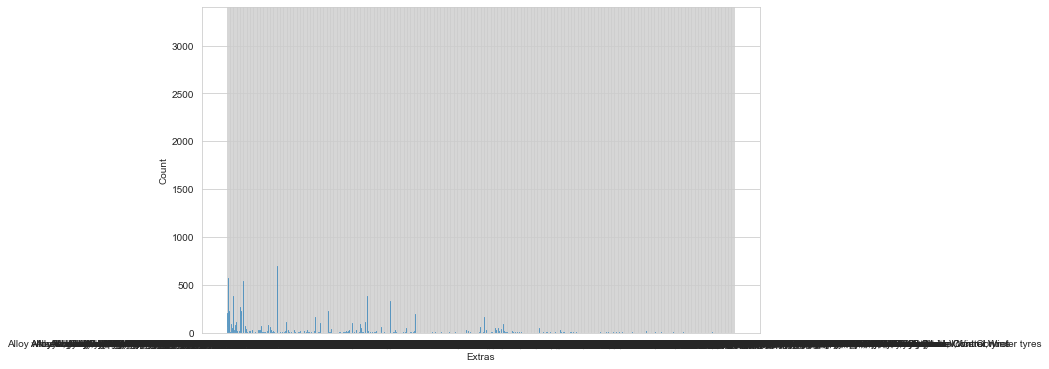

In [54]:
sns.histplot(data=df, x="Extras", bins=10);

In [57]:
df["Extras"].fillna(method="ffill", inplace=True)

In [59]:
df["Extras"].value_counts()

Alloy wheels                                                                                               3876
Alloy wheels,Touch screen                                                                                   839
Alloy wheels,Voice Control                                                                                  709
Alloy wheels,Touch screen,Voice Control                                                                     637
Roof rack                                                                                                   540
                                                                                                           ... 
Alloy wheels,Handicapped enabled,Shift paddles                                                                1
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                      

# Filling Safety & Security 

In [69]:
df["Safety & Security"].fillna(method="ffill", inplace=True)

In [70]:
df["Safety & Security"].value_counts()

ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      563
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                 510
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                     

# Filling Gears

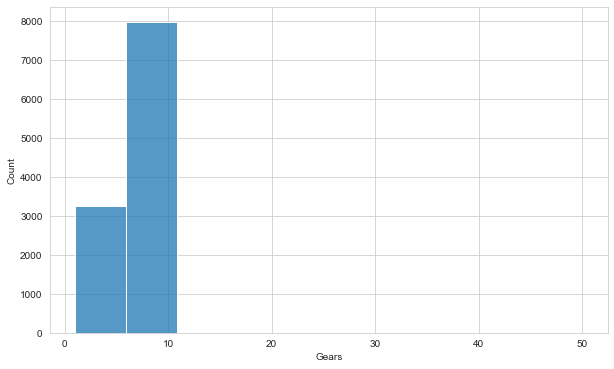

In [55]:
sns.histplot(data=df, x="Gears", bins=10);

In [178]:
df["Gears"].fillna(method="bfill", inplace=True)

In [179]:
df["Gears"].value_counts()

6.000     8353
5.000     4417
7.000     2842
8.000      287
9.000       11
3.000        3
1.000        2
4.000        2
2.000        1
50.000       1
Name: Gears, dtype: int64

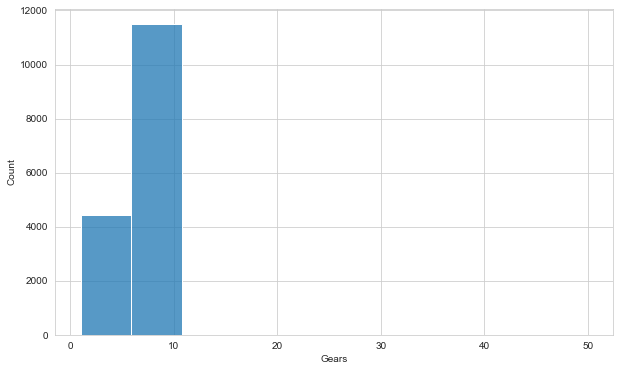

In [180]:
sns.histplot(data=df, x="Gears", bins=10);

In [181]:
df["Type"].mode()

0    Used
dtype: object

In [182]:
df["Type"].fillna(df["Type"].mode()[0],inplace=True)

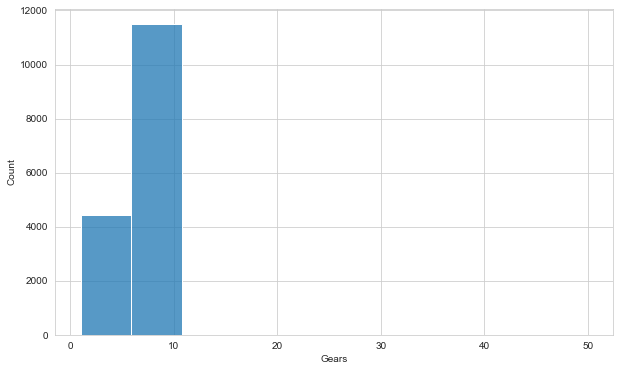

In [183]:
sns.histplot(data=df, x="Gears", bins=10);

# Filling Previous_Owners 

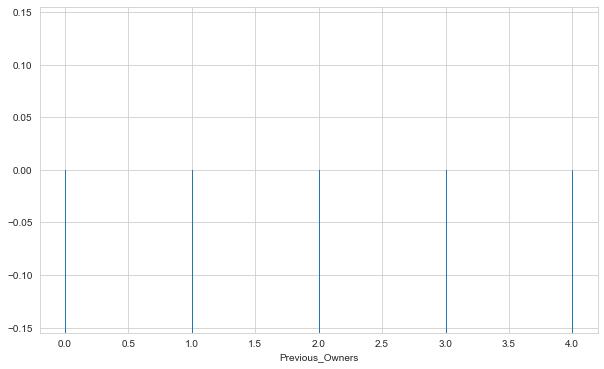

In [82]:
sns.rugplot(df["Previous_Owners"], height=0.5);

In [166]:
df["Previous_Owners"].fillna(method="ffill", inplace=True)

# Filling hp_kW

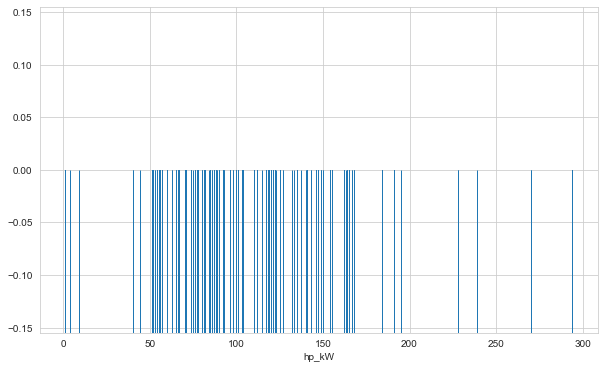

In [84]:
sns.rugplot(df["hp_kW"], height=0.5);

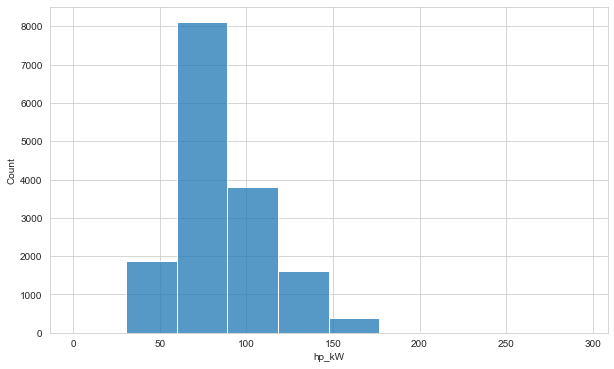

In [85]:
sns.histplot(data=df, x="hp_kW", bins=10);

In [86]:
df["hp_kW"].fillna(method="ffill", inplace=True)

In [87]:
df["hp_kW"].value_counts()

85.000     2544
66.000     2130
81.000     1402
100.000    1309
110.000    1114
70.000      888
125.000     710
51.000      695
55.000      577
118.000     539
92.000      466
121.000     393
147.000     383
77.000      345
56.000      297
54.000      281
103.000     254
87.000      237
165.000     200
88.000      179
60.000      161
162.000      98
74.000       81
96.000       72
71.000       59
101.000      49
67.000       40
154.000      39
122.000      35
119.000      32
164.000      27
135.000      24
52.000       22
82.000       22
1.000        20
78.000       20
146.000      18
294.000      18
141.000      16
57.000       10
120.000       8
104.000       8
117.000       7
112.000       7
191.000       7
155.000       6
184.000       5
65.000        4
90.000        4
76.000        4
168.000       3
98.000        3
149.000       3
93.000        3
63.000        3
80.000        3
53.000        2
143.000       2
86.000        2
140.000       2
150.000       2
228.000       2
270.000 

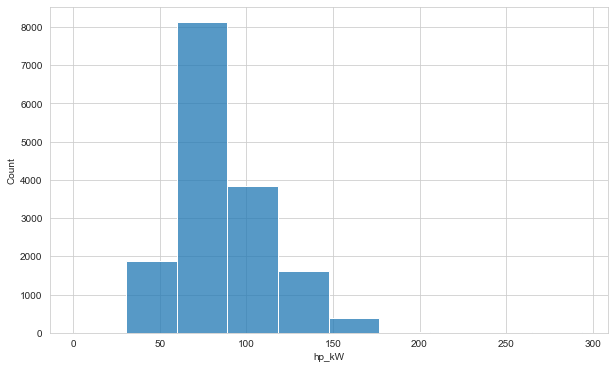

In [88]:
sns.histplot(data=df, x="hp_kW", bins=10);

# Filling Paint_Type 

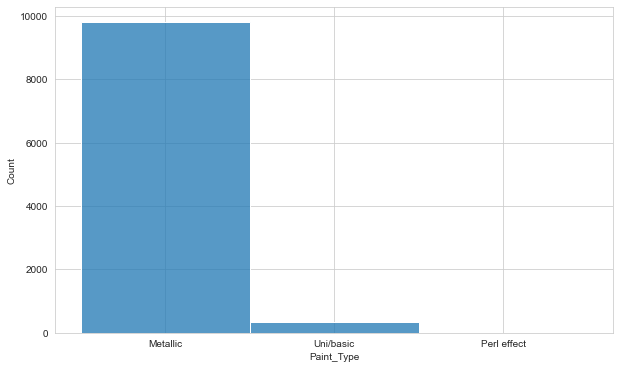

In [66]:
sns.histplot(data=df, x="Paint_Type", bins=10);

In [98]:
df["Paint_Type"].mode()

0    Metallic
dtype: object

In [99]:
df.Paint_Type.value_counts()/len(df)*100

Metallic      61.524
Uni/basic      2.180
Perl effect    0.038
Name: Paint_Type, dtype: float64

In [101]:
df["Paint_Type"].fillna(method="ffill", inplace=True)

In [102]:
df["Paint_Type"].value_counts()

Metallic       15261
Uni/basic        617
Perl effect       41
Name: Paint_Type, dtype: int64

In [103]:
df.Paint_Type.value_counts()/len(df)*100

Metallic      95.867
Uni/basic      3.876
Perl effect    0.258
Name: Paint_Type, dtype: float64

# Filling Upholstery_type  

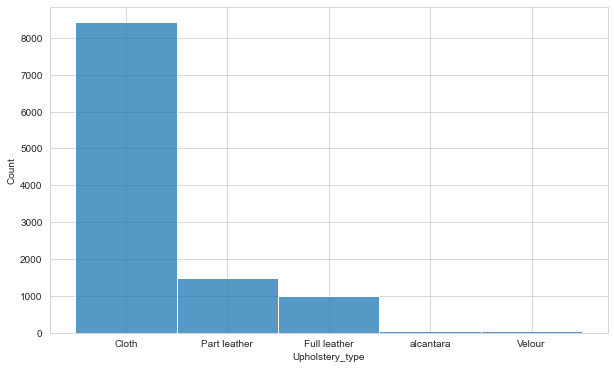

In [93]:
sns.histplot(data=df, x="Upholstery_type", bins=10);

In [94]:
df.Upholstery_type.value_counts()/len(df)*100

Cloth          52.912
Part leather    9.416
Full leather    6.338
Velour          0.377
alcantara       0.358
Name: Upholstery_type, dtype: float64

In [95]:
df["Upholstery_type"].fillna(method="ffill", inplace=True)

In [96]:
df.Upholstery_type.value_counts()/len(df)*100

Cloth          76.437
Part leather   13.562
Full leather    8.958
alcantara       0.528
Velour          0.515
Name: Upholstery_type, dtype: float64

In [104]:
df.isnull().sum()/len(df)*100

make_model               0.000
body_type                0.000
price                    0.000
vat                      0.000
km                       6.433
Type                     0.000
Body Color               0.000
Paint Type               0.000
Gearing Type             0.000
Cylinders                0.000
Fuel                     0.000
Comfort & Convenience    0.000
Entertainment & Media    0.000
Extras                   0.000
Safety & Security        0.000
Gears                    0.006
Previous_Owners         41.711
hp_kW                    0.000
Paint_Type               0.000
Upholstery_type          0.000
Upholstery_color        31.899
Nr_of_Doors              1.332
Nr_of_Seats              6.137
Gearing_Type             0.000
Displacement_cc          3.116
Weight_kg               43.809
Drive_chain             43.081
cons_comb               12.771
cons_city               15.302
cons_country            14.926
CO2_Emission            15.302
Emission_Class          22.790
dtype: f

# Filling Upholstery_color 

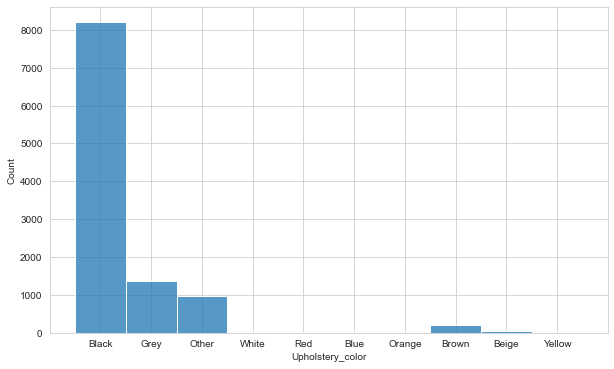

In [105]:
sns.histplot(data=df, x="Upholstery_color", bins=10);

In [106]:
df.Upholstery_color.value_counts()/len(df)*100

Black    51.517
Grey      8.644
Other     6.031
Brown     1.300
Beige     0.339
Blue      0.101
White     0.082
Red       0.057
Yellow    0.025
Orange    0.006
Name: Upholstery_color, dtype: float64

In [107]:
df["Upholstery_color"].fillna(method="ffill", inplace=True)

In [108]:
df.Upholstery_color.value_counts()/len(df)*100

Black    74.245
Grey     12.796
Other     9.460
Brown     2.525
Beige     0.465
Blue      0.201
White     0.182
Red       0.088
Yellow    0.031
Orange    0.006
Name: Upholstery_color, dtype: float64

# Filling Nr_of_Doors 

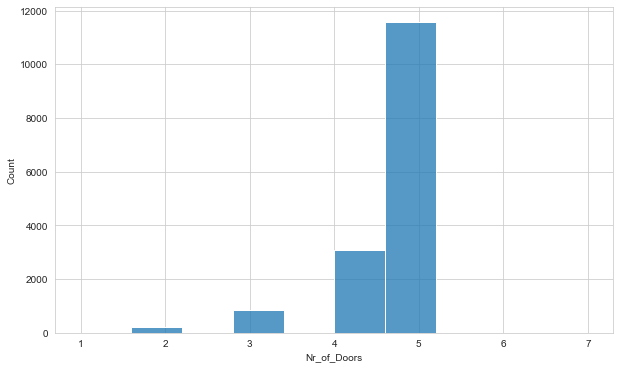

In [110]:
sns.histplot(data=df, x="Nr_of_Doors", bins=10);

In [111]:
df["Nr_of_Doors"].fillna(method="ffill", inplace=True)

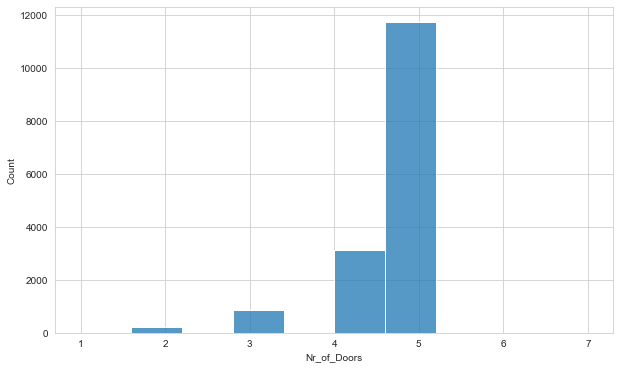

In [112]:
sns.histplot(data=df, x="Nr_of_Doors", bins=10);

In [113]:
df.isnull().sum()/len(df)*100

make_model               0.000
body_type                0.000
price                    0.000
vat                      0.000
km                       6.433
Type                     0.000
Body Color               0.000
Paint Type               0.000
Gearing Type             0.000
Cylinders                0.000
Fuel                     0.000
Comfort & Convenience    0.000
Entertainment & Media    0.000
Extras                   0.000
Safety & Security        0.000
Gears                    0.006
Previous_Owners         41.711
hp_kW                    0.000
Paint_Type               0.000
Upholstery_type          0.000
Upholstery_color         0.000
Nr_of_Doors              0.000
Nr_of_Seats              6.137
Gearing_Type             0.000
Displacement_cc          3.116
Weight_kg               43.809
Drive_chain             43.081
cons_comb               12.771
cons_city               15.302
cons_country            14.926
CO2_Emission            15.302
Emission_Class          22.790
dtype: f

# Filling Nr_of_Seats

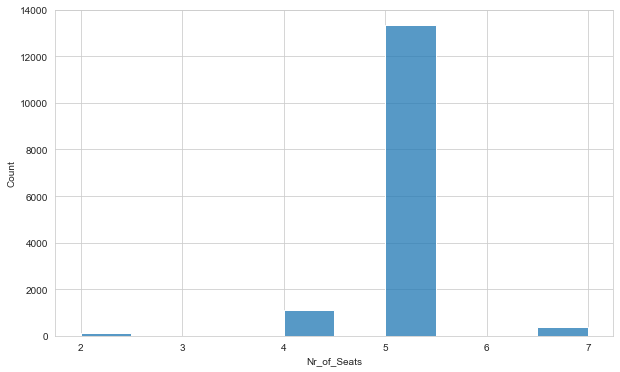

In [116]:
sns.histplot(data=df, x="Nr_of_Seats", bins=10);

In [117]:
df["Nr_of_Seats"].fillna(method="ffill", inplace=True)

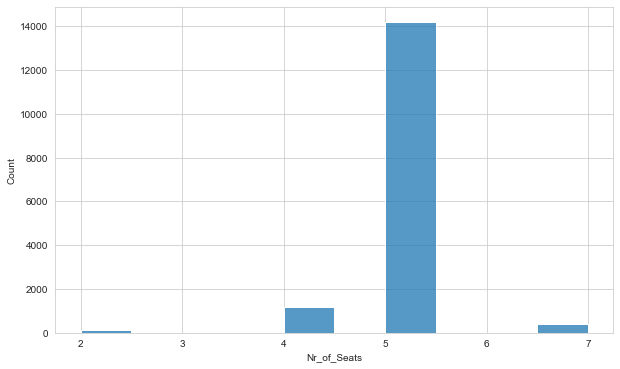

In [118]:
sns.histplot(data=df, x="Nr_of_Seats", bins=10);

# Filling Displacement_cc 

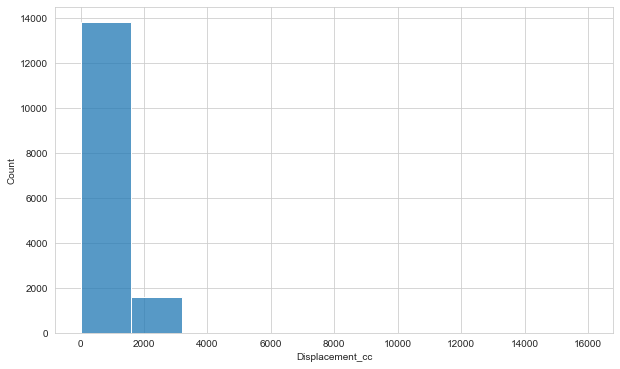

In [119]:
sns.histplot(data=df, x="Displacement_cc", bins=10);

In [120]:
df["Displacement_cc"].fillna(method="ffill", inplace=True)

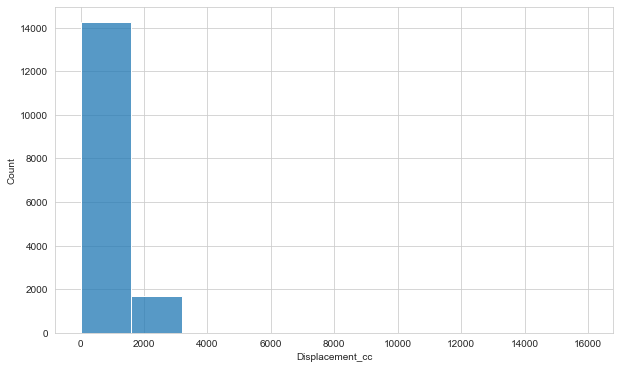

In [121]:
sns.histplot(data=df, x="Displacement_cc", bins=10);

In [122]:
df.isnull().sum()/len(df)*100

make_model               0.000
body_type                0.000
price                    0.000
vat                      0.000
km                       6.433
Type                     0.000
Body Color               0.000
Paint Type               0.000
Gearing Type             0.000
Cylinders                0.000
Fuel                     0.000
Comfort & Convenience    0.000
Entertainment & Media    0.000
Extras                   0.000
Safety & Security        0.000
Gears                    0.006
Previous_Owners         41.711
hp_kW                    0.000
Paint_Type               0.000
Upholstery_type          0.000
Upholstery_color         0.000
Nr_of_Doors              0.000
Nr_of_Seats              0.000
Gearing_Type             0.000
Displacement_cc          0.000
Weight_kg               43.809
Drive_chain             43.081
cons_comb               12.771
cons_city               15.302
cons_country            14.926
CO2_Emission            15.302
Emission_Class          22.790
dtype: f

# Filling Weight_kg 

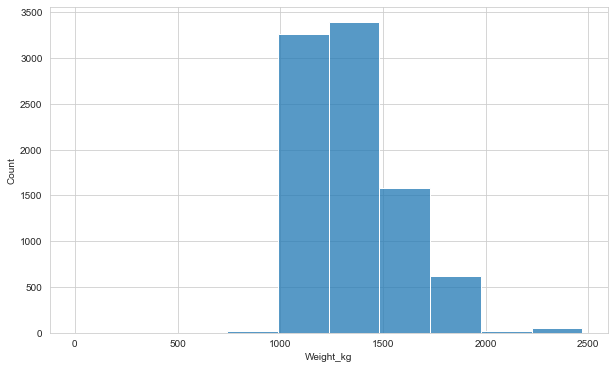

In [123]:
sns.histplot(data=df, x="Weight_kg", bins=10);

In [124]:
df["Weight_kg"].fillna(method="ffill", inplace=True)

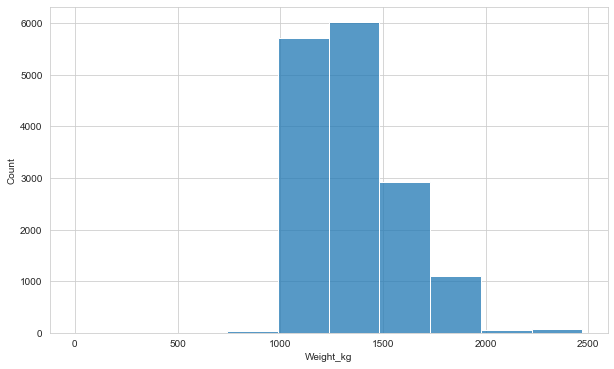

In [125]:
sns.histplot(data=df, x="Weight_kg", bins=10);

# Filling Drive_chain  

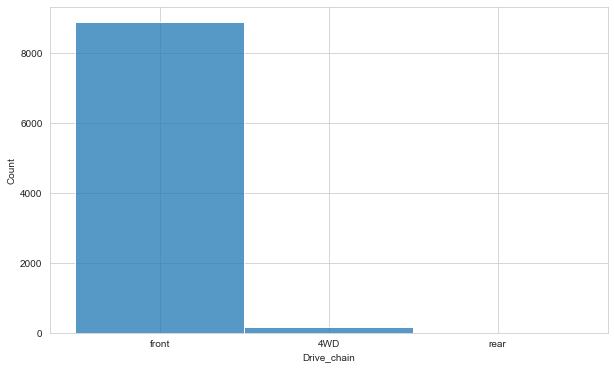

In [155]:
sns.histplot(data=df, x="Drive_chain", bins=10);

In [156]:
df["Drive_chain"].fillna(method="bfill", inplace=True)

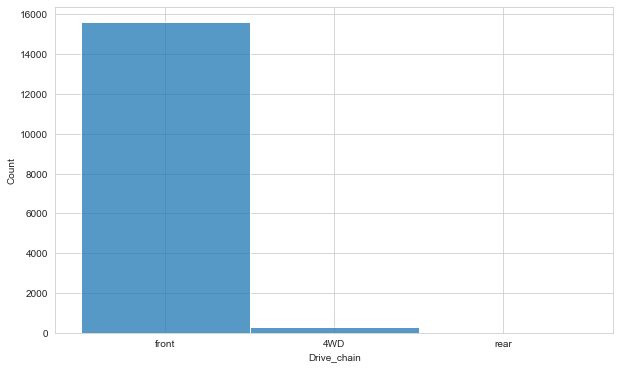

In [157]:
sns.histplot(data=df, x="Drive_chain", bins=10);

# Filling cons_comb

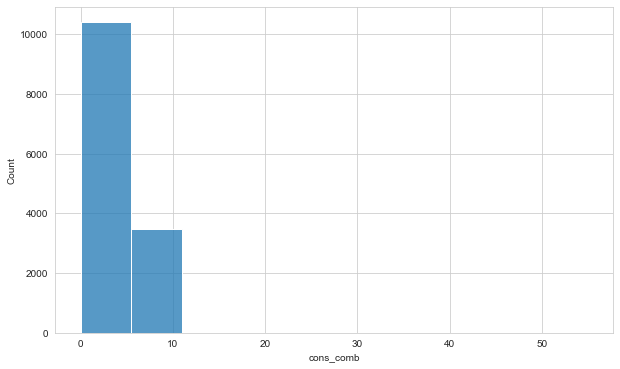

In [140]:
sns.histplot(data=df, x="cons_comb", bins=10);

In [142]:
df["cons_comb"].fillna(method="bfill", inplace=True)

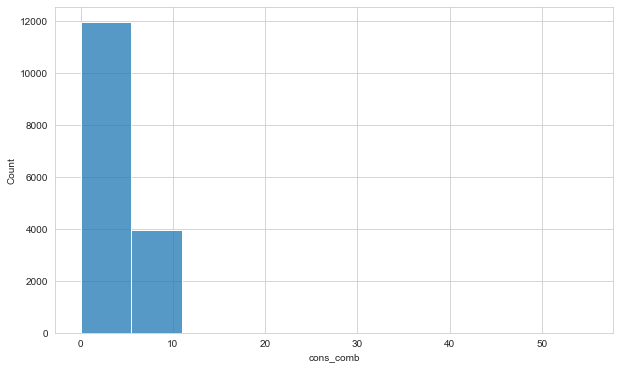

In [143]:
sns.histplot(data=df, x="cons_comb", bins=10);

# Filling cons_city

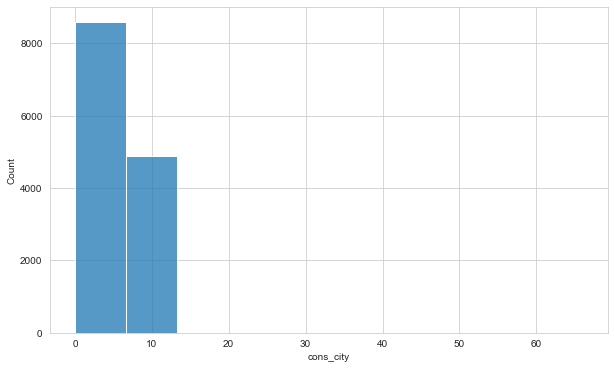

In [139]:
sns.histplot(data=df, x="cons_city", bins=10);

In [146]:
df["cons_city"].fillna(method="ffill", inplace=True)

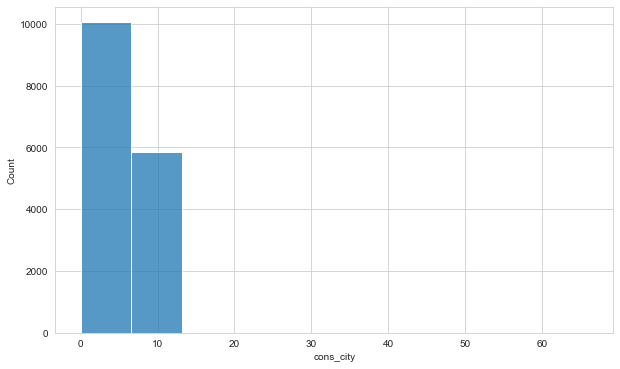

In [147]:
sns.histplot(data=df, x="cons_city", bins=10);

# Filling cons_country 

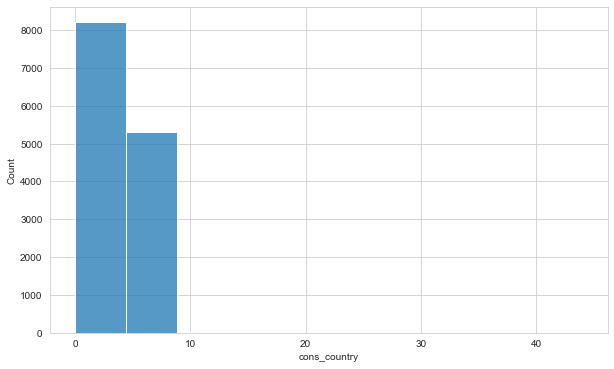

In [138]:
sns.histplot(data=df, x="cons_country", bins=10);

In [145]:
df["cons_country"].fillna(method="ffill", inplace=True)

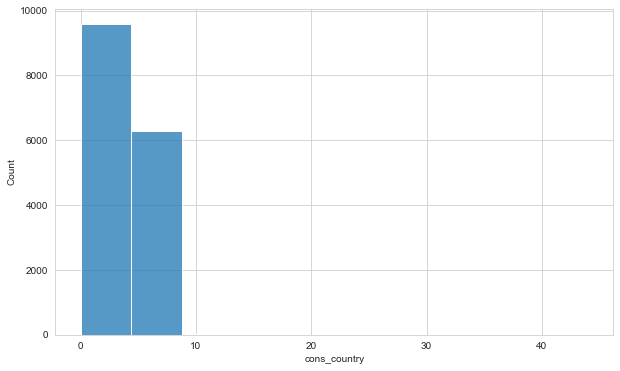

In [148]:
sns.histplot(data=df, x="cons_country", bins=10);

# Filling CO2_Emission

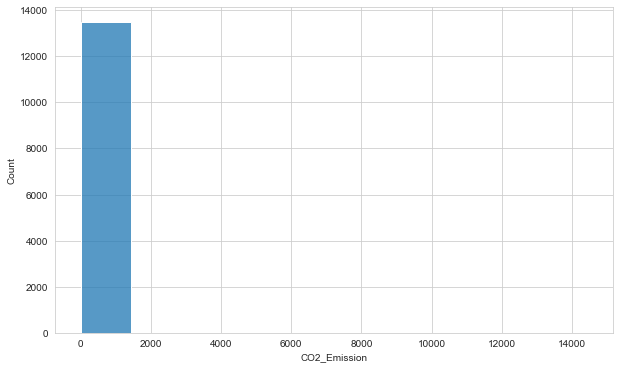

In [137]:
sns.histplot(data=df, x="CO2_Emission", bins=10);

In [149]:
df["CO2_Emission"].fillna(method="ffill", inplace=True)

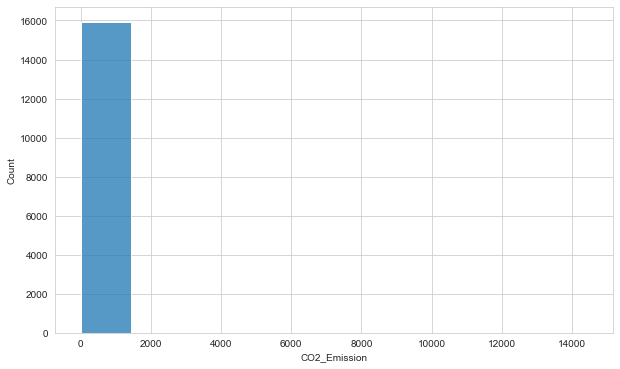

In [150]:
sns.histplot(data=df, x="CO2_Emission", bins=10);

In [151]:
df.CO2_Emission.value_counts()/len(df)*100

120.000     5.786
97.000      3.895
99.000      3.876
104.000     3.757
102.000     3.367
103.000     2.996
114.000     2.827
107.000     2.783
108.000     2.720
119.000     2.663
124.000     2.645
128.000     2.607
106.000     2.437
85.000      2.243
126.000     2.136
127.000     2.060
110.000     1.935
118.000     1.916
109.000     1.746
117.000     1.727
139.000     1.727
111.000     1.709
113.000     1.677
129.000     1.614
140.000     1.539
105.000     1.508
123.000     1.457
135.000     1.457
92.000      1.413
130.000     1.376
116.000     1.231
112.000     1.225
95.000      1.206
150.000     1.206
141.000     1.175
143.000     1.156
145.000     1.093
133.000     1.093
98.000      1.074
136.000     1.049
125.000     1.036
137.000     0.967
134.000     0.923
149.000     0.905
153.000     0.867
101.000     0.867
147.000     0.854
132.000     0.729
115.000     0.628
121.000     0.609
122.000     0.603
138.000     0.572
93.000      0.509
168.000     0.477
142.000     0.402
148.000   

# Filling Emission_Class

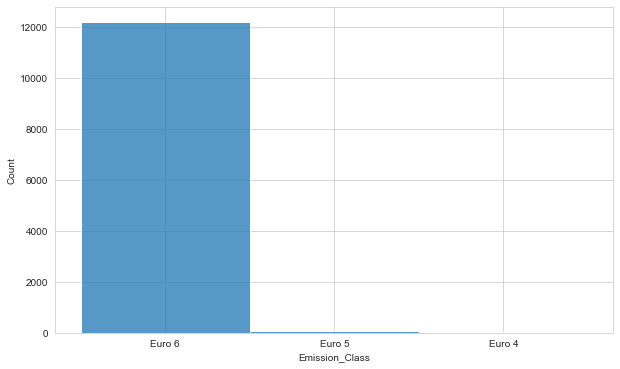

In [126]:
sns.histplot(data=df, x="Emission_Class", bins=10);

In [127]:
df.Emission_Class.value_counts()

Euro 6    12173
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

In [128]:
df["Emission_Class"].fillna(method="ffill", inplace=True)

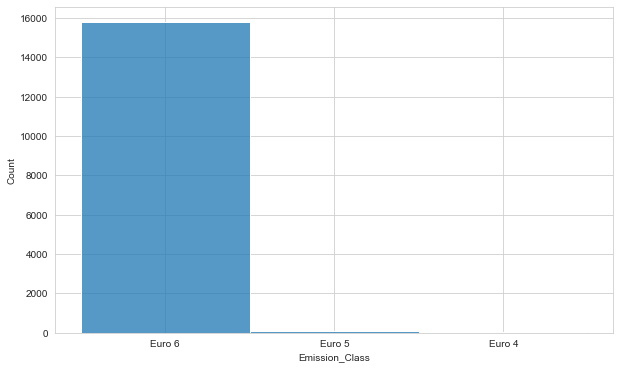

In [129]:
sns.histplot(data=df, x="Emission_Class", bins=10);

In [167]:
df.isnull().sum()/len(df)*100

make_model              0.000
body_type               0.000
price                   0.000
vat                     0.000
km                      0.000
Type                    0.000
Body Color              0.000
Paint Type              0.000
Gearing Type            0.000
Cylinders               0.000
Fuel                    0.000
Comfort & Convenience   0.000
Entertainment & Media   0.000
Extras                  0.000
Safety & Security       0.000
Gears                   0.006
Previous_Owners         0.000
hp_kW                   0.000
Paint_Type              0.000
Upholstery_type         0.000
Upholstery_color        0.000
Nr_of_Doors             0.000
Nr_of_Seats             0.000
Gearing_Type            0.000
Displacement_cc         0.000
Weight_kg               0.000
Drive_chain             0.000
cons_comb               0.000
cons_city               0.000
cons_country            0.000
CO2_Emission            0.000
Emission_Class          0.000
dtype: float64

# Saving  file in csv format with Handling With Missing Values

In [168]:
df.shape

(15919, 32)

In [185]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible
km,56013.000,80000.000,83450.000,73000.000,16200.000
Type,Used,Used,Used,Used,Used
Body Color,Black,Red,Black,Brown,Black
Paint Type,Metallic,Metallic,Metallic,Metallic,Metallic
Gearing Type,Automatic,Automatic,Automatic,Automatic,Automatic
Cylinders,3.000,4.000,4.000,3.000,3.000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             15919 non-null  object 
 1   body_type              15919 non-null  object 
 2   price                  15919 non-null  int64  
 3   vat                    15919 non-null  object 
 4   km                     15919 non-null  float64
 5   Type                   15919 non-null  object 
 6   Body Color             15919 non-null  object 
 7   Paint Type             15919 non-null  object 
 8   Gearing Type           15919 non-null  object 
 9   Cylinders              15919 non-null  float64
 10  Fuel                   15919 non-null  object 
 11  Comfort & Convenience  15919 non-null  object 
 12  Entertainment & Media  15919 non-null  object 
 13  Extras                 15919 non-null  object 
 14  Safety & Security      15919 non-null  object 
 15  Ge

In [186]:
df.to_csv("clean_scout_emrePART2.csv", index=False)